In [1]:
import numpy as np

from lamp import *
from lamp.models import *
from lamp.utils import * 

In [40]:
def analyse_compression(model, datax, datay, title="", dtype="mnist", nb_classes=10):
    decoded = model.predict(datax)

    show = show_mnist if dtype == "mnist" else show_usps

    examples = np.zeros(nb_classes, dtype=np.int64)
    for i in range(nb_classes):
        examples[i] = np.where(datay == i)[0][0]
 
    plt.figure(figsize=(12, 3))
    for i, x in enumerate(examples):
        plt.subplot(2, nb_classes, i + 1)
        show(datax[x])
        plt.subplot(2, nb_classes, i + nb_classes + 1)
        show(decoded[x])

    plt.show()

In [3]:
train_X, train_y = load_usps("../data/USPS_train.txt")
test_X, test_y = load_usps("../data/USPS_test.txt")
onehot = to_onehot(train_y)

train_X.shape

(7291, 256)

In [12]:
mc = MultiClass()
mc.fit(train_X, onehot, hidden=128, nb_iter=1000, gradient_step=1e-2, batch_size=500, early_stop=1e-4)

print(f"Training classification score : {mc.score(train_X, train_y)}")
print(f"Testing classification score : {mc.score(test_X, test_y)}")

early stopping activated
Training classification score : 0.9048141544369771
Testing classification score : 0.8560039860488291


In [26]:
ae_batch = AutoEncoder()
ae_batch.fit(train_X, train_X, hidden=[100], latent=10, nb_iter=4000, gradient_step=1e-4, batch_size=730, early_stop=5e-6)

early stopping activated


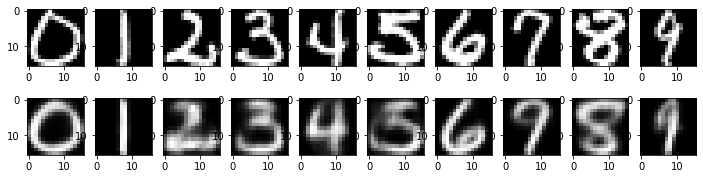

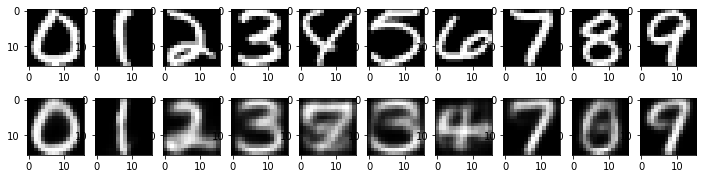

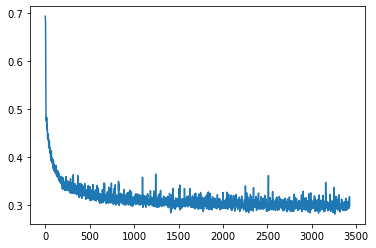

0.8060622685502674
0.7678126557050324


In [27]:
analyse_compression(ae_batch, train_X, train_y, dtype="usps")
analyse_compression(ae_batch, test_X, test_y, dtype="usps")

timesteps = np.arange(len(ae_batch.train_losses))
plt.plot(timesteps, ae_batch.train_losses)
plt.show()

print(mc.score(ae_batch.predict(train_X), train_y))
print(mc.score(ae_batch.predict(test_X), test_y))

In [17]:
noise_amount = 0.3
train_Xnoised = noise_data(train_X, noise_amount)
test_Xnoised = noise_data(test_X, noise_amount)

In [28]:
ae_noise = AutoEncoder()
ae_noise.fit(train_Xnoised, train_X, hidden=[100], latent=10, nb_iter=4000, gradient_step=1e-4, batch_size=730, early_stop=5e-6)

early stopping activated


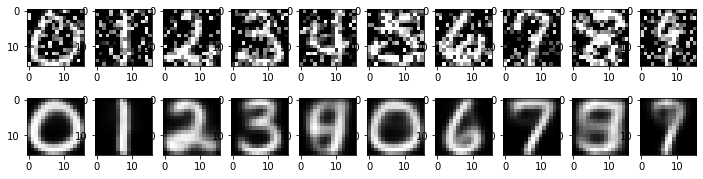

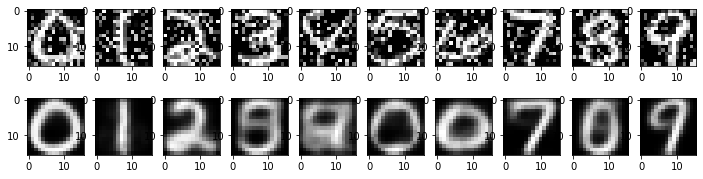

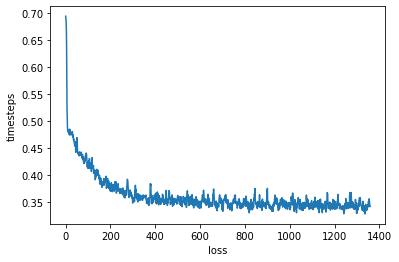

0.7014127005897682
0.6721474838066767


In [41]:
analyse_compression(ae_noise, train_Xnoised, train_y, "denoised data", dtype="usps")
analyse_compression(ae_noise, test_Xnoised, test_y, "", dtype="usps")

timesteps = np.arange(len(ae_noise.train_losses))
plt.plot(timesteps, ae_noise.train_losses)
plt.xlabel("loss")
plt.ylabel("timesteps")
plt.show()
 
print(mc.score(ae_noise.predict(train_X), train_y))
print(mc.score(ae_noise.predict(test_X), test_y))